In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('hr_analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## EDA

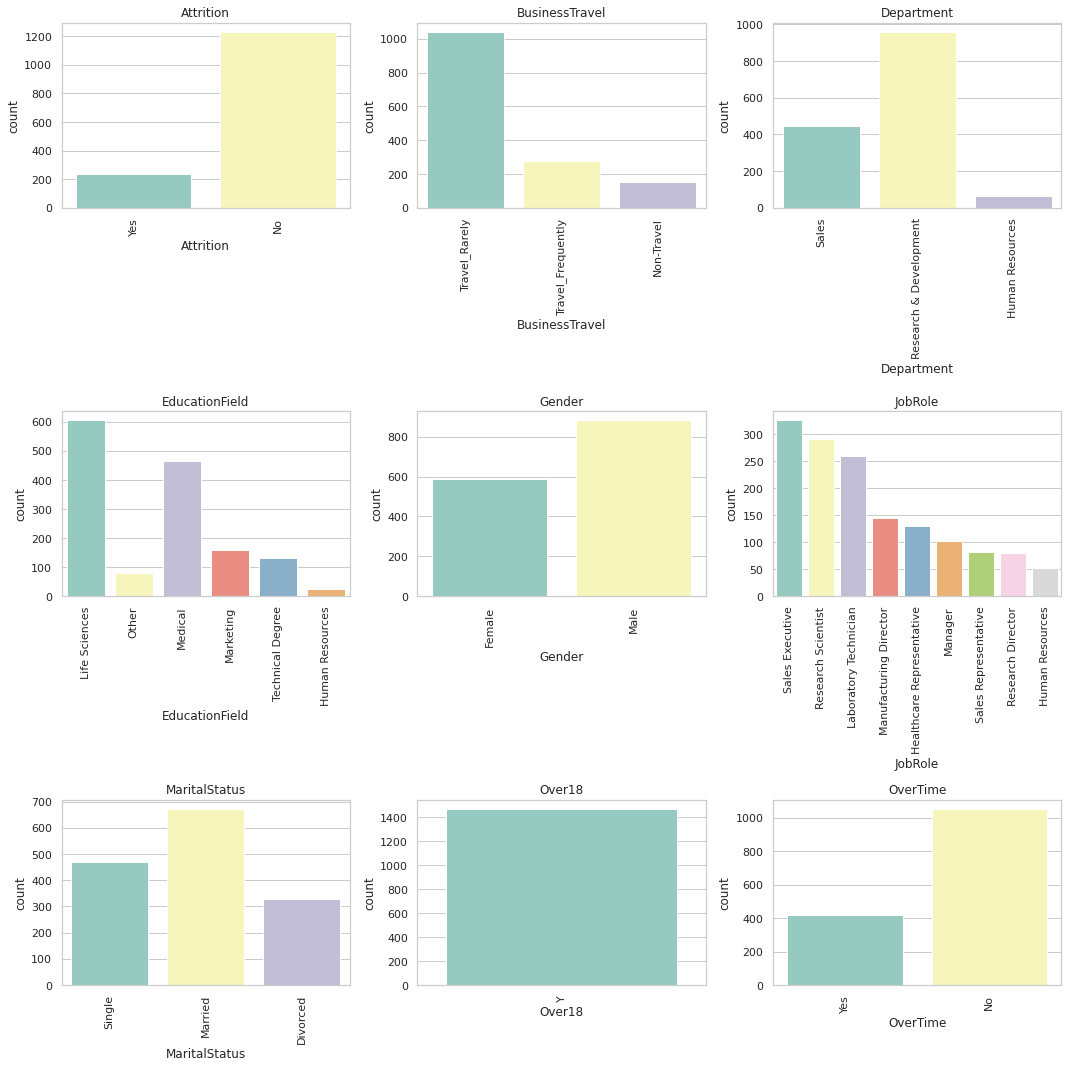

In [ ]:
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']

plt.figure(figsize=(15, 15))
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in obj_cols:
    ax = plt.subplot(3, 3, plotnumber)
    sns.countplot(x = feature, data = df)
    plt.xlabel(feature)
    plt.title(feature)
    plt.xticks(rotation=90)
    plotnumber += 1
    plt.tight_layout();

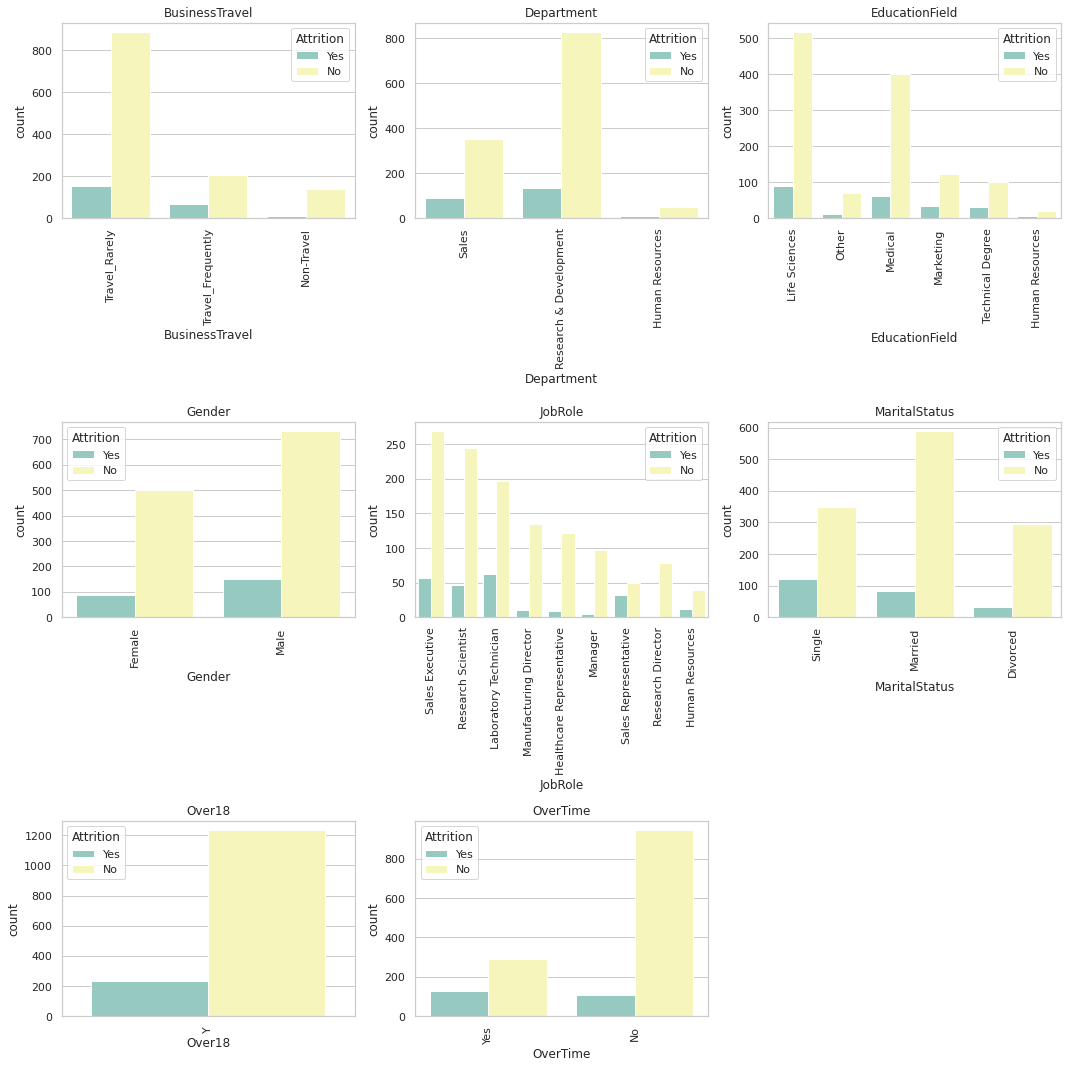

In [ ]:
obj_cols = [col for col in df.columns if (df[col].dtypes == 'object') & (col not in 'Attrition')]

plt.figure(figsize=(15, 15))
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in obj_cols:
    ax = plt.subplot(3, 3, plotnumber)
    sns.countplot(x = feature, hue = 'Attrition', data = df)
    plt.xlabel(feature)
    plt.title(feature)
    plt.xticks(rotation=90)
    plotnumber += 1
    plt.tight_layout();

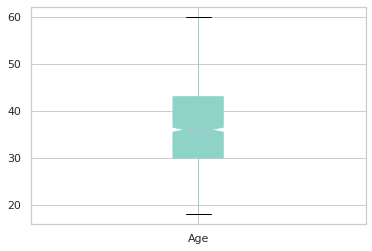

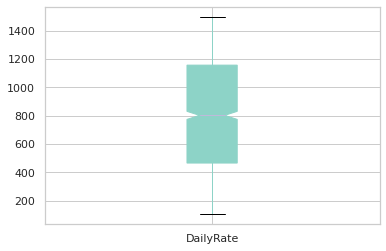

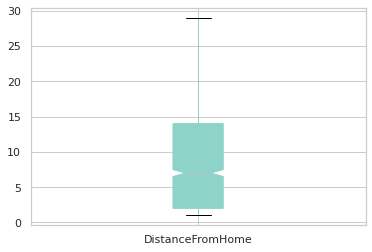

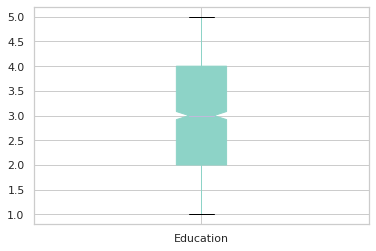

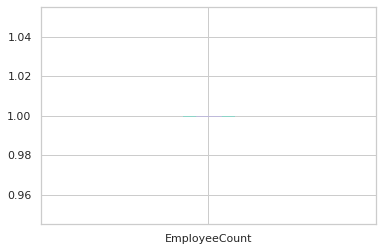

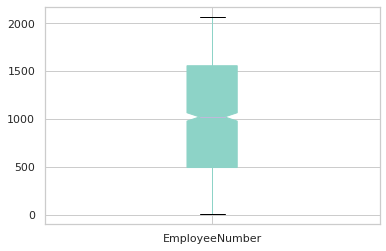

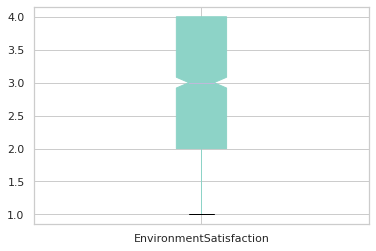

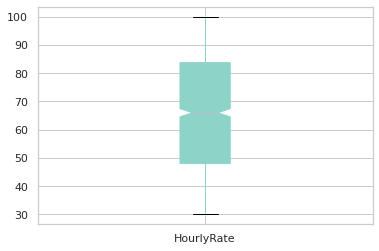

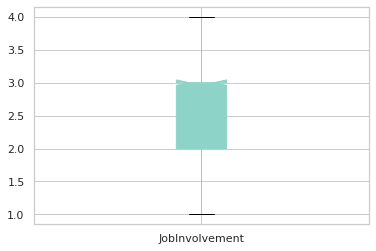

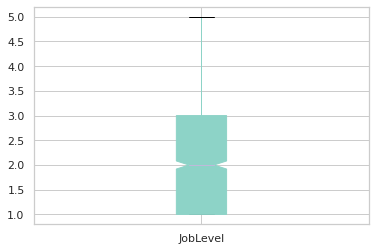

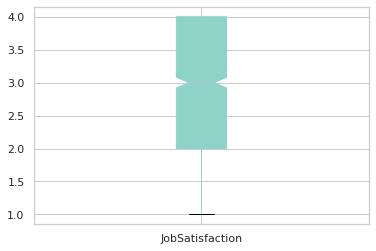

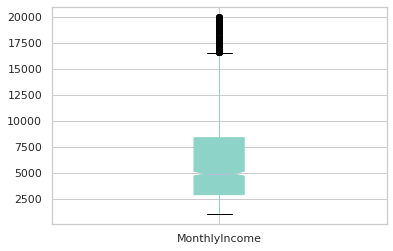

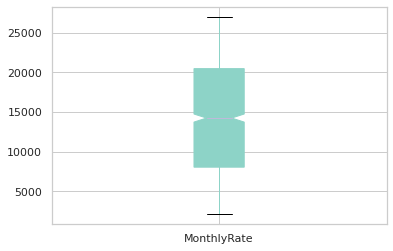

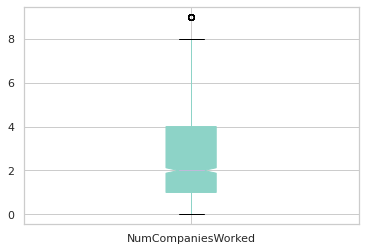

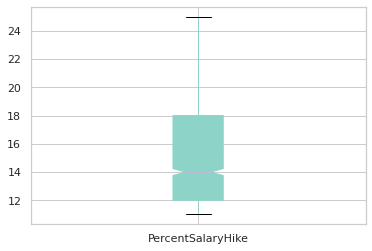

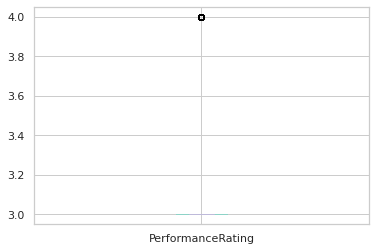

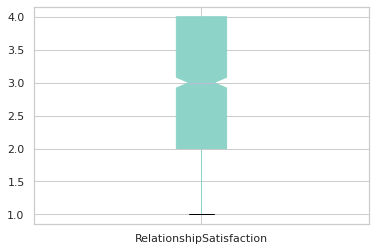

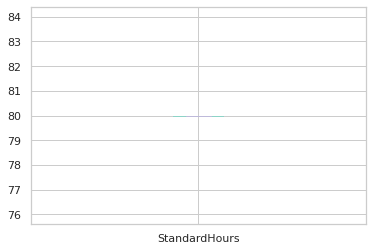

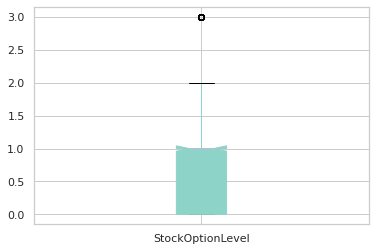

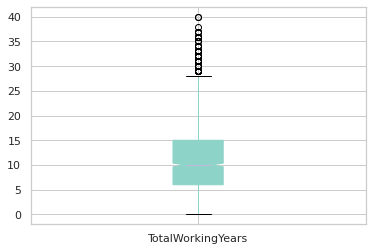

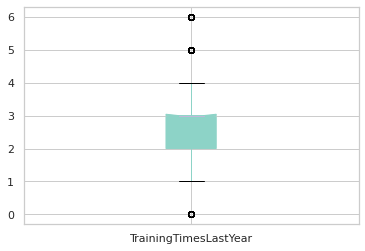

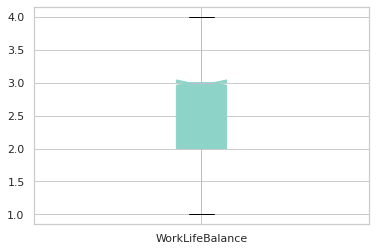

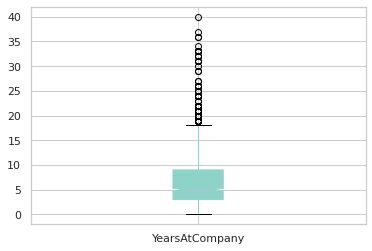

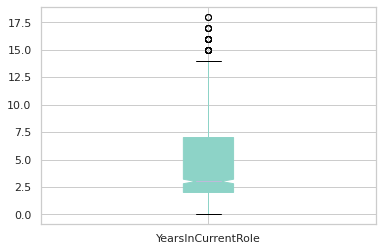

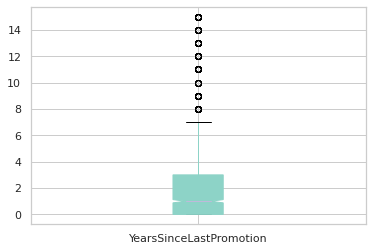

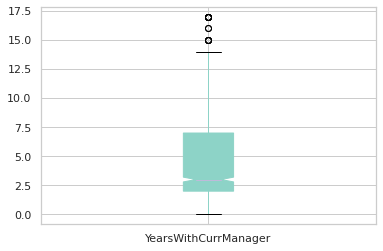

In [ ]:
int_cols = [col for col in df.columns if df[col].dtypes == 'int64']

for feature in df[int_cols]:
    df[feature].plot(kind='box', notch=True, patch_artist=True)
    plt.show();

In [ ]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [ ]:
quantile_cols = [col for col in df.columns if (df[col].dtypes == 'int64') & (col not in ['EmployeeCount', 'PerformanceRating', 'StandardHours'])]


In [ ]:
#Delete outlier.
def outlier(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    b_bawah=q1-1.5*iqr
    b_atas=q3+1.5*iqr
    return data.loc[~((data<b_bawah)& (data>b_atas))]

In [ ]:
df[quantile_cols] = df[quantile_cols].apply(outlier)

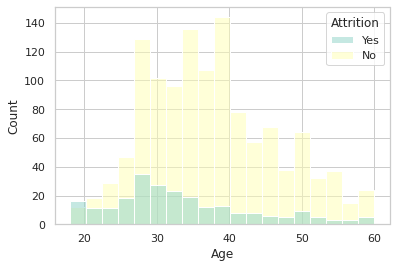

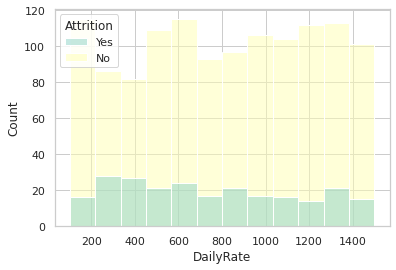

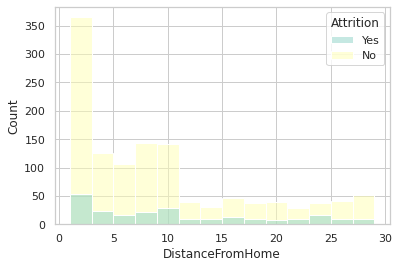

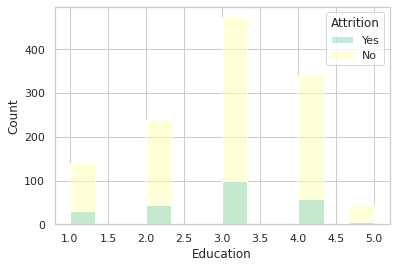

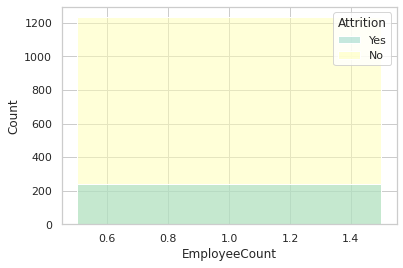

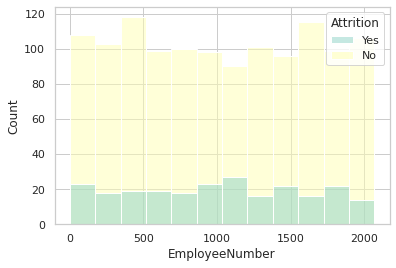

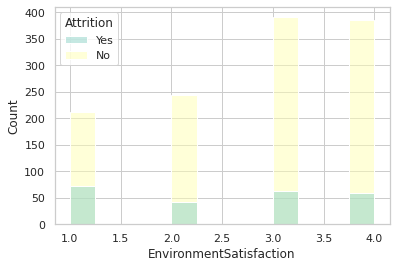

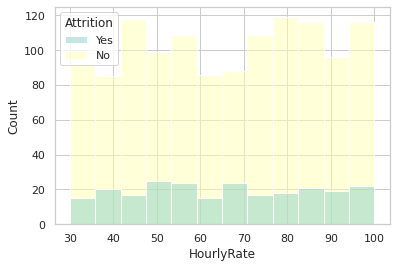

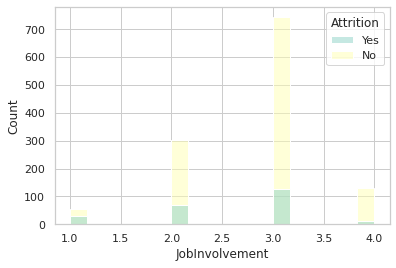

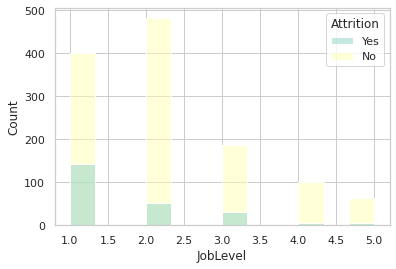

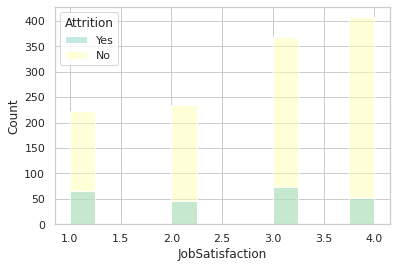

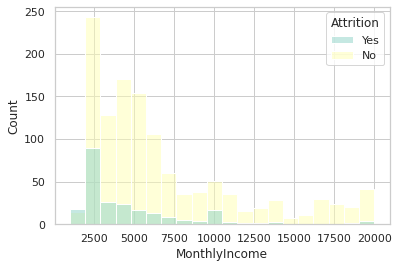

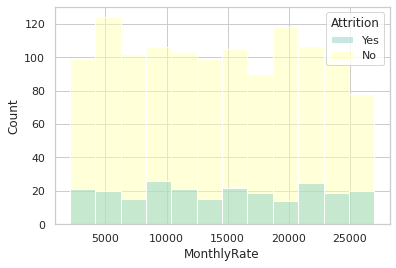

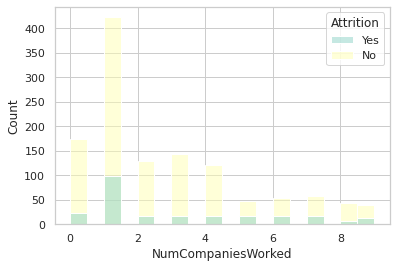

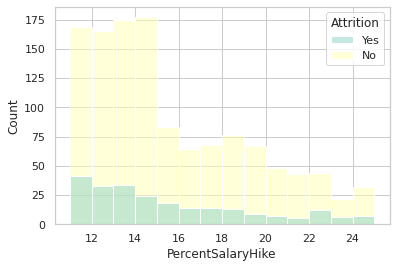

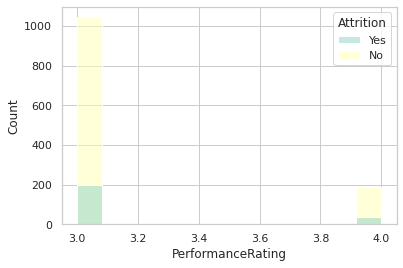

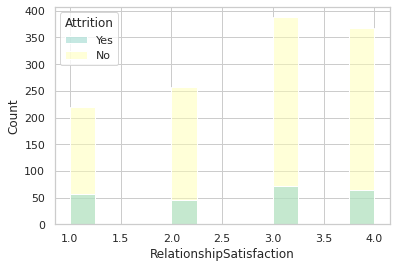

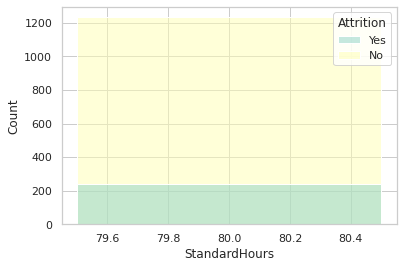

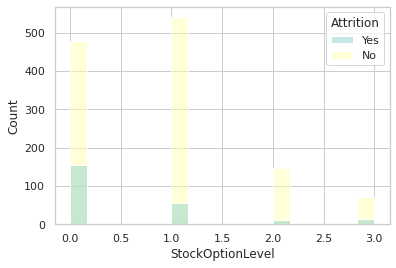

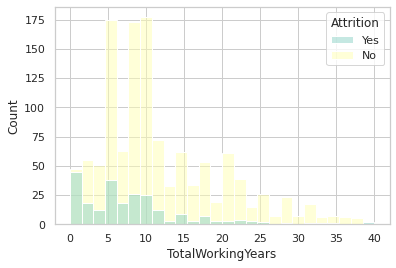

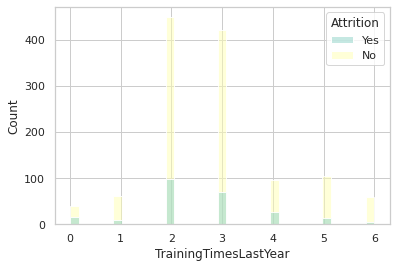

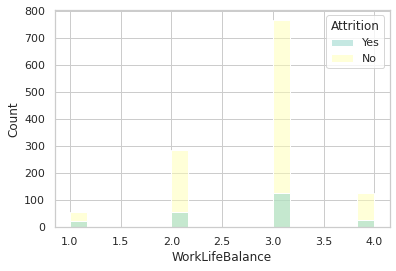

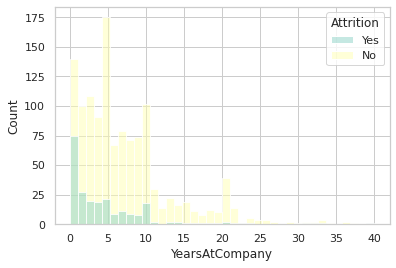

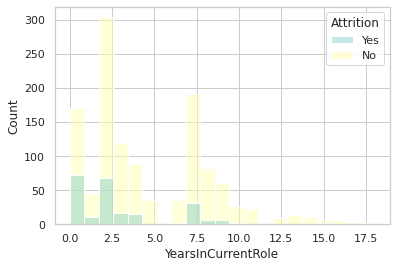

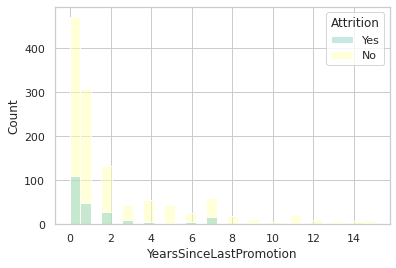

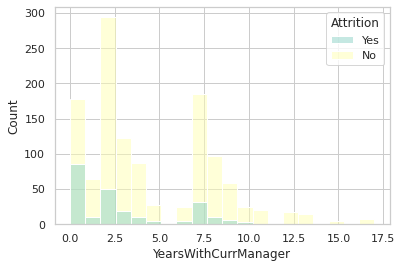

In [ ]:
for feature in df[int_cols]:
    sns.histplot(x=feature, hue="Attrition", data=df)
    plt.show();



Modelling

Preprocessing

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df.drop('Over18', axis = 1, inplace = True)
# df['Attrition'] = df['Attrition'].map({"Yes" : 1, "No" : 0})

In [ ]:
cols = [col for col in df.columns if col not in ['Attrition',
   'BusinessTravel',
   'Department',
   'Gender',
   'MaritalStatus',
   'OverTime','EducationField', 'JobRole']]

In [ ]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['Attrition', 'BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'OverTime']),
                                 ('binary encoder',ce.BinaryEncoder(),['EducationField', 'JobRole'])
                                ], remainder = 'passthrough')

In [ ]:
df_prep = transformer.fit_transform(df)

In [ ]:
df_prep = pd.DataFrame(df_prep)

In [ ]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + cols

df_prep.columns = features



In [ ]:
df_prep.rename(columns = {'x0_Yes' : 'Attrition', 'x5_Yes' : 'OverTime'}, inplace = True)

In [ ]:
sm = SMOTE()

In [ ]:
# Define X and y
X_prep = df_prep.drop(columns='Attrition')
y_prep = df_prep['Attrition']

In [ ]:
# Define X and y
X = df.drop(columns='Attrition')
y = df['Attrition']

In [ ]:
X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(X_prep,y_prep, stratify = y_prep, test_size = 0.2)
                                                                        
                                                                        

In [ ]:
X_train, X_test, y_train, y_test =r train_test_split(X,y, stratify = y, test_size = 0.2)

In [ ]:
X_train_oversampled_prep, y_train_oversampled_prep = sm.fit_resample(X_train_prep, y_train_prep)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_oversampled_prep = pd.DataFrame(X_train_oversampled_prep, columns = X_train_prep.columns)

Classification Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import f1_score


from scipy import stats

In [ ]:
lr = LogisticRegression(random_state= 0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state= 0)


models = [lr, knn]
nilai_mean = []
nilai_std = []

for i in models:
    
    estimator = Pipeline([
                        #('encoding', transformer),
                        ('scaling',MinMaxScaler()),
                        #('balancing',smote)
                        ('model', i)])
        
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(estimator, X_train_oversampled_prep, y_train_oversampled_prep, cv = skfold, scoring = 'f1')
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())
    

In [ ]:
clf_rf = RandomForestClassifier(random_state = 0)
clf_xgb = XGBClassifier(random_state = 0)

models = [tree, clf_rf, clf_xgb]
nilai_mean_tree = []
nilai_std_tree = []

for i in models:
    
    estimator = Pipeline([
                        # ('encoding', transformer),
                        ('model', i)])
        
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(estimator, X_train_oversampled_prep, y_train_oversampled_prep, cv = skfold, scoring = 'f1')
    nilai_mean_tree.append(model_cv.mean())
    nilai_std_tree.append(model_cv.std())
    

In [ ]:
lr_knn = pd.DataFrame({
    'model': ['logreg','knn'],
    'mean': nilai_mean,
    'std': nilai_std
})

tree = pd.DataFrame({
    'model': ['tree', 'forest', 'xgb'],
    'mean': nilai_mean_tree,
    'std': nilai_std_tree
})

est = pd.concat([lr_knn, tree])
est

,model,mean,std
0,logreg,0.799057,0.019399
1,knn,0.834562,0.014583
0,tree,0.836183,0.164451
1,forest,0.872731,0.230744
2,xgb,0.818705,0.313124


### **Interpretasi**

Di antara kelima model, nilai rata-rata precision yang paling tinggi adalah model random forest, mencapai 88.7%. Disisi lain, model KNN paling stabil karena nilai rata-rata standar deviasinya terkecil, mencapai 0.01%. Oleh karena itu, kedua model ini dipilih lagi dan menggunakan hyperparameter untuk kemudian dibandingkan lagi.

> ## Choose Factor K

In [ ]:
from sklearn.decomposition import PCA

# We create PCA to transform all of X features into 2D vectors
# PCA will be used on plotting 2D contour
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_prep)
principalDf = pd.DataFrame(data = principalComponents, columns = ["PC1","PC2"])

In [ ]:
# Principal Component Dataset
X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(principalDf,y_prep,test_size=0.3,random_state=123)

In [ ]:
X_train_oversampled_pc, y_train_oversampled_pc = sm.fit_resample(X_train_pc, y_train_pc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
scoree = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    estimator = Pipeline([
                            #('encoding', transformer),
                            ('scaling',MinMaxScaler()),
                            #('balancing',sm),
                            ('model', knn)])
    
    estimator.fit(X_train_oversampled_pc, y_train_oversampled_pc)

    y_predict_train = knn.predict(X_train_oversampled_pc)
    training_accuracies.append(f1_score(y_train_oversampled_pc,y_predict_train))

    y_predict_test = knn.predict(X_test_pc)
    acc_score = f1_score(y_test_pc,y_predict_test)
    testing_accuracies.append(acc_score)

    if scoree < acc_score:
        scoree = acc_score
        best_k = i

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

([<matplotlib.axis.XTick at 0x7f329957ea50>,
 <a list of 15 Text major ticklabel objects>)

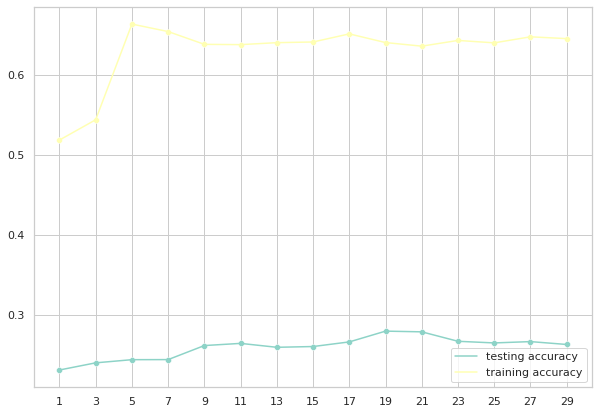

In [ ]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))

In [ ]:
print('best k:', best_k)
print('accuracy:', scoree)

best k: 19
accuracy: 0.27936507936507937


In [ ]:
scores = pd.DataFrame({
    'k' : k,
    'accuracy_test' : testing_accuracies,
    'accuracy_train' : training_accuracies
})

scores

,k,accuracy_test,accuracy_train
0,1,0.230769,0.518253
1,3,0.239726,0.543601
2,5,0.243678,0.663239
3,7,0.243781,0.653880
4,9,0.261333,0.637899
5,11,0.264045,0.637542
6,13,0.259155,0.640000
7,15,0.260116,0.640852
8,17,0.265896,0.650984
9,19,0.279365,0.640119


XGB

In [ ]:
# # make the algorithm chains
# model = XGBClassifier()
# #estimator = Pipeline([('encode', transformer), ('balancing',sm),('clf',model)])

# # hyperparameter space
# param_dist = {'n_estimators': stats.randint(150, 1000),
#               'learning_rate': stats.uniform(0.01, 0.59),
#               'subsample': stats.uniform(0.3, 0.6),
#               'max_depth': [3, 4, 5, 6, 7, 8, 9],
#               'colsample_bytree': stats.uniform(0.5, 0.4),
#               'min_child_weight': [1, 2, 3, 4]
#              }
# # stratified cross vaidation
# skf = StratifiedKFold(n_splits = 5)

# # hyperparameter tuning
# grid_search = GridSearchCV(
#     model, # model to tune
#     param_distributions = param_dist, # hyperparameter space
#     cv = skf, # evaluation method
#     scoring = 'accuracy', # metrics
#     n_jobs = -1 # use all cores
# )


# grid_search.fit(X_train_oversampled_prep,y_train_oversampled_prep)


clf_xgb = XGBClassifier(random_state = 0)
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

# stratified cross vaidation
skf = StratifiedKFold(n_splits = 5)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = skf,  
                         n_iter = 5, 
                         scoring = 'f1', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [ ]:
clf.fit(X_train_oversampled_prep,y_train_oversampled_prep)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   23.1s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='bin...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f328cd49fd0>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        '

In [ ]:
print('best score',clf.best_score_)
print('best param',clf.best_params_)

best score 0.8352150275424515
best param {'colsample_bytree': 0.7988057768153238, 'learning_rate': 0.46775925945016605, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 878, 'subsample': 0.8702706754528025}


In [ ]:
clf.best_estimator_.fit(X_train_oversampled_prep,y_train_oversampled_prep)
y_pred = clf.best_estimator_.predict(X_test_prep)

Evaluation

In [ ]:
from sklearn.metrics import classification_report,  plot_confusion_matrix

In [ ]:
print(classification_report(y_test_prep,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       247
         1.0       0.47      0.36      0.41        47

    accuracy                           0.83       294
   macro avg       0.68      0.64      0.66       294
weighted avg       0.82      0.83      0.82       294



<Figure size 1440x1440 with 0 Axes>

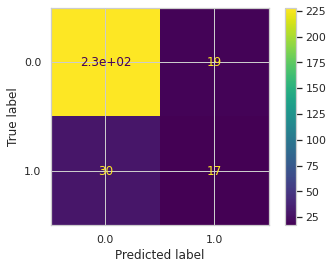

In [ ]:
plt.figure(figsize=(20, 20))
plot_confusion_matrix(clf, X_test_prep, y_test_prep)  
plt.show()

In [ ]:
clf_xgb = XGBClassifier(random_state=0, colsample_bytree = 0.7988057768153238, learning_rate = 0.46775925945016605, max_depth = 9, min_child_weight =  3, n_estimators =  878, subsample =  0.8702706754528025)

clf_xgb.fit(X_train_oversampled_prep,y_train_oversampled_prep)
y_pred = clf_xgb.predict(X_test_prep)

<Figure size 3600x3600 with 0 Axes>

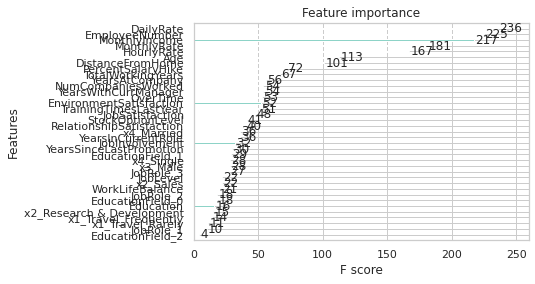

In [ ]:
from xgboost import plot_importance
plt.figure(figsize=(50, 50))
plot_importance(clf_xgb)
plt.show()

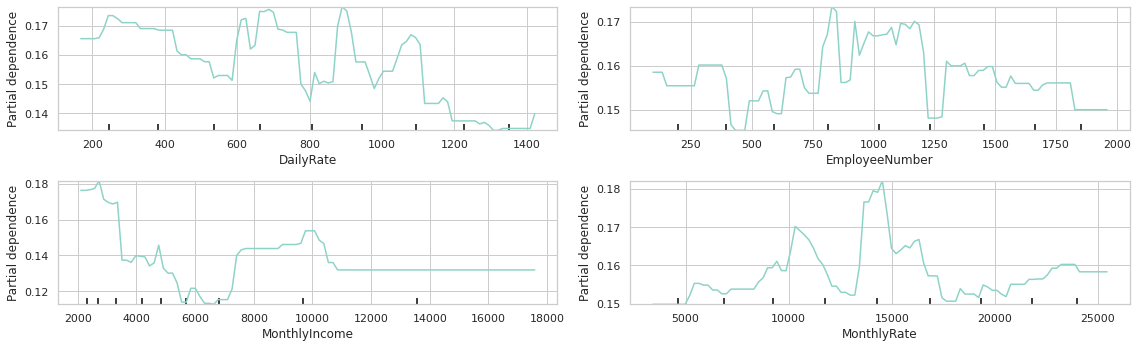

In [ ]:
from sklearn.inspection import plot_partial_dependence

# We try to compare 4 features using partial dependence
fig, ax = plt.subplots(2,2, figsize=(16, 5))
plot_partial_dependence(clf_xgb, X_train_prep,["DailyRate"], ax=ax[0,0])
plot_partial_dependence(clf_xgb, X_train_prep,["EmployeeNumber"], ax=ax[0,1])
plot_partial_dependence(clf_xgb, X_train_prep,["MonthlyIncome"], ax=ax[1,0])
plot_partial_dependence(clf_xgb, X_train_prep,["MonthlyRate"], ax=ax[1,1])
plt.tight_layout()
plt.show()

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 27.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509238 sha256=6efd51442c12866f273854352d994cd80439973b14b76c6cdb030feeb35f8677
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


feature_dependence = "independent" has been renamed to feature_perturbation = "interventional"! See GitHub issue #882.
 96%|=================== | 1133/1176 [00:15<00:00]       

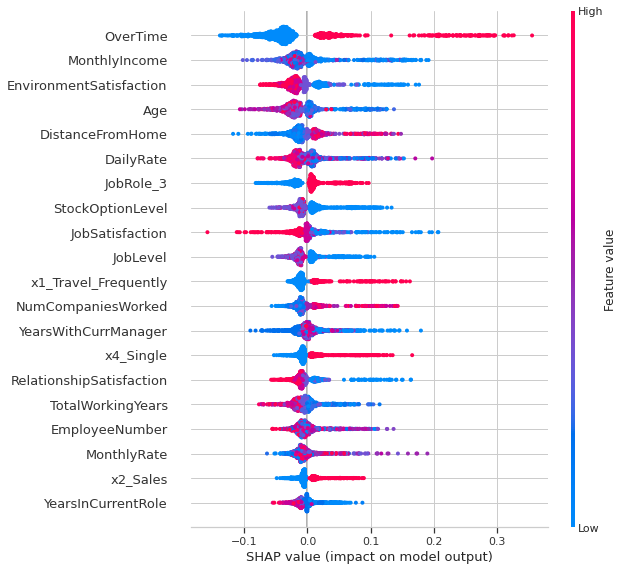

In [ ]:
import shap

shap_values = shap.TreeExplainer(clf_xgb,
                                 data = X_train_prep,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_train_prep)
shap.summary_plot(shap_values, X_train_prep,feature_names = X_train_prep.columns)